# Análisis de huaics en Ancash, Perú
**Autor:** David Duran
rsa


## Resumen
Este cuaderno presenta un análisis detallado de diversos eventos ocurridos en la región de Ancash, Perú. Utilizando datos extraídos de SIGRID (CENEPRED) y técnicas de visualización geoespacial, se identifican los tipos de eventos y las áreas más afectadas dentro de la región.

## Introducción
Este cuaderno de Jupyter analiza datos relacionados con diversos eventos en la región de Ancash, Perú. El objetivo es presentar los resultados de una manera clara y visual para una audiencia diversa.

In [1]:
%%capture
!pip install jupyterthemes geopandas seaborn

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sigrid_data_extractor import extractor

from jupyterthemes import get_themes
import jupyterthemes as jt
import seaborn as sns
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')
plt.style.use('seaborn-v0_8-muted')

plt.rcParams['text.usetex'] = True

Vamos a obtener los datos del siguiente URL, que contiene información sobre diferentes eventos en Ancash.

In [2]:
url = "https://sigrid.cenepred.gob.pe/arcgis/rest/services/Cartografia_Peligros/MapServer/5020100/query?f=json&where=1%3D1&returnGeometry=true&spatialRel=esriSpatialRelIntersects&geometry=%7B%22rings%22%3A%5B%5B%5B-8989295.539643947%2C-1375988.8655829763%5D%2C%5B-8989295.539643947%2C-808520.3675939788%5D%2C%5B-8363123.403931949%2C-808520.3675939788%5D%2C%5B-8363123.403931949%2C-1375988.8655829763%5D%2C%5B-8989295.539643947%2C-1375988.8655829763%5D%5D%5D%2C%22spatialReference%22%3A%7B%22wkid%22%3A102100%2C%22latestWkid%22%3A3857%7D%7D&geometryType=esriGeometryPolygon&inSR=102100&outFields=*&outSR=102100"
data = extractor.extract_data(url)

Datos guardados en output.csv y output.xlsx.


Aquí, filtramos los datos para la región de Ancash y mostramos las primeras filas de este conjunto de datos filtrado.


In [3]:
ancash_data = pd.DataFrame([datum for datum in data if datum['dpto'] == 'Ancash'])
ancash_data.head()

,objectid_1,objectid,muestra,proyecto,proyecto_c,norte,este,longitud,latitud,dpto,...,observ,fecha_act,reclasif,fuente,fuente_log,url,url_img,id_entidad,id_documento,id_documento1
0,3,238.0,Peligros,"Estudio Riesgos Geológicos - Franjas 1,2,3,4",F-1234,8851736.0,237613.0,-77.396309,-10.378625,Ancash,...,None,NaN,None,,INGEMMET,,,None,None,None
1,4,239.0,Peligros,"Estudio Riesgos Geológicos - Franjas 1,2,3,4",F-1234,8865339.0,228528.0,-77.478265,-10.255080,Ancash,...,None,NaN,None,,INGEMMET,,,None,None,None
2,5,240.0,Peligros,"Estudio Riesgos Geológicos - Franjas 1,2,3,4",F-1234,8876181.0,244999.0,-77.327277,-10.158214,Ancash,...,None,NaN,None,,INGEMMET,,,None,None,None
3,6,241.0,Peligros,"Estudio Riesgos Geológicos - Franjas 1,2,3,4",F-1234,8878636.0,261613.0,-77.175577,-10.137067,Ancash,...,None,NaN,None,,INGEMMET,,,None,None,None
4,7,242.0,Peligros,"Estudio Riesgos Geológicos - Franjas 1,2,3,4",F-1234,8878974.0,262288.0,-77.169400,-10.134053,Ancash,...,None,NaN,None,,INGEMMET,,,None,None,None


En esta celda, identificaremos el tipo de evento y la provincia más afectada para cada evento.


In [4]:
event_types = ancash_data['peligro_es'].unique()
results = {}
for event in event_types:
    event_data = ancash_data[ancash_data['peligro_es'] == event]
    most_affected_province = event_data['prov'].value_counts().idxmax()
    results[event] = most_affected_province

results_df = pd.DataFrame(list(results.items()), columns=['Evento', 'Provincia más afectada'])
results_df.head()

,Evento,Provincia más afectada
0,Reptación de Suelo,Mariscal Luzuriaga
1,Erosión en Cárcavas,Bolognesi
2,Caída de Roca,Bolognesi
3,Deslizamiento,Bolognesi
4,Derrumbe,Bolognesi


Agrupamos los datos por tipo de evento y provincia, y calculamos la cantidad de cada grupo.

In [5]:
event_counts_by_province = ancash_data.groupby(['peligro_es', 'prov']).size().reset_index(name='counts')
event_counts_by_province.columns = ['Evento', 'Provincia', 'Cantidad']
event_counts_by_province.head()

,Evento,Provincia,Cantidad
0,,,12
1,,Aija,8
2,,Antonio Raymondi,7
3,,Asuncion,4
4,,Bolognesi,82


A continuación, visualizamos la distribución de eventos en Ancash por provincia.

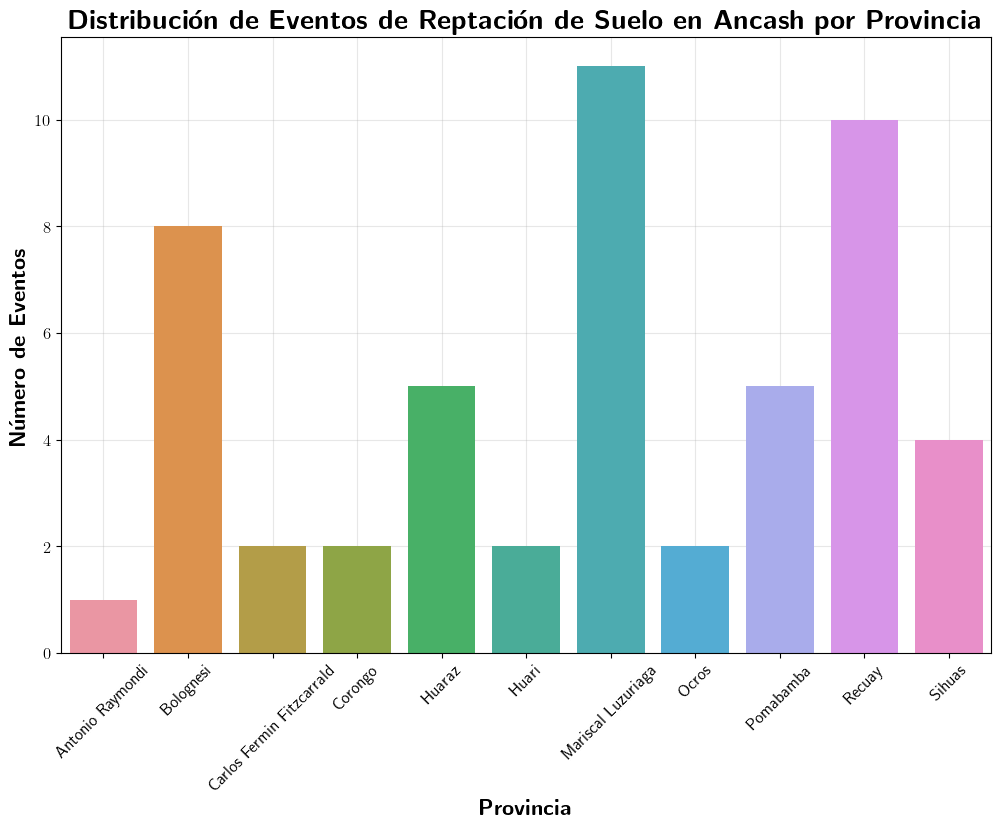

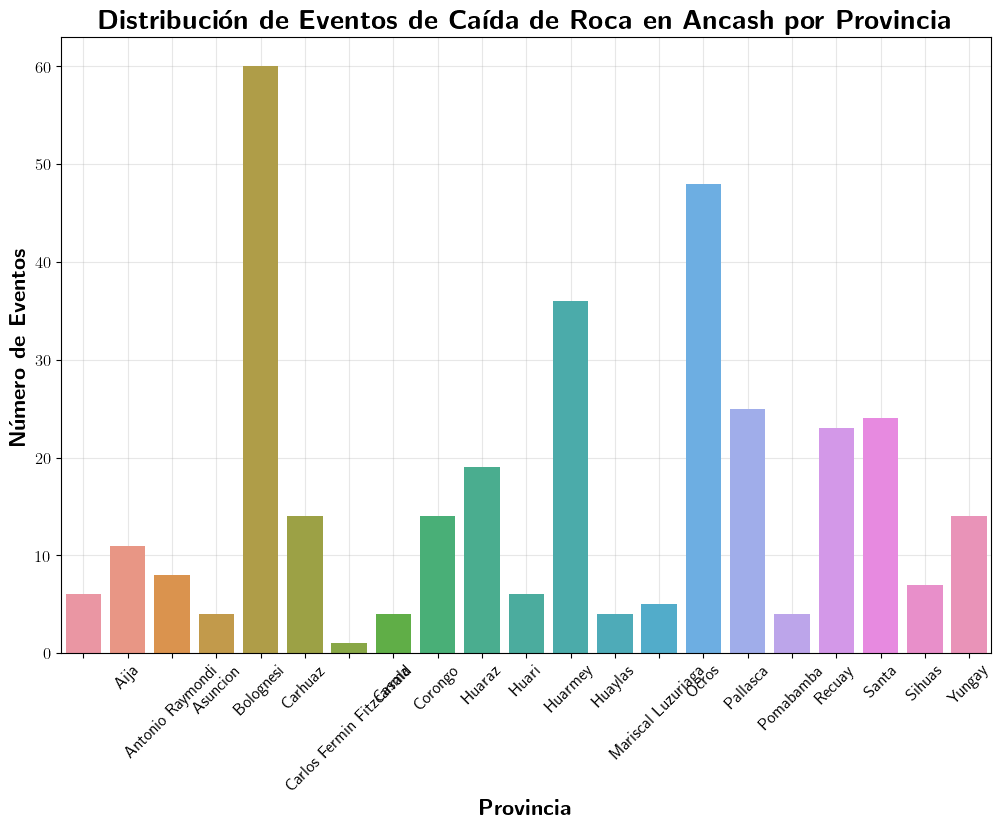

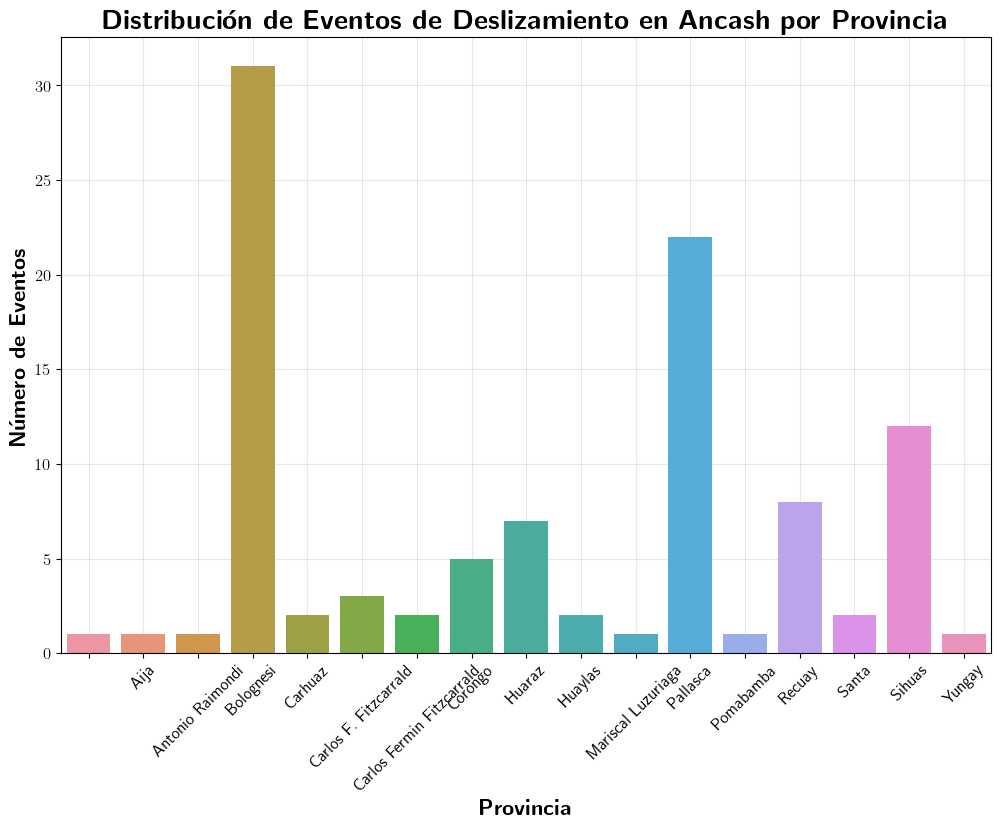

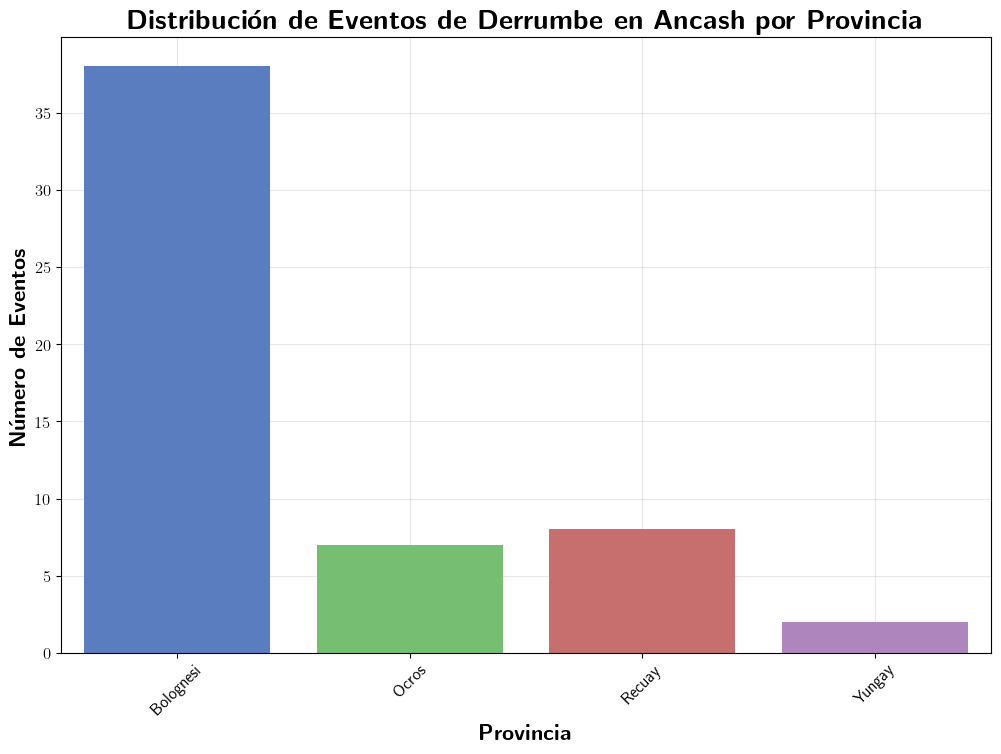

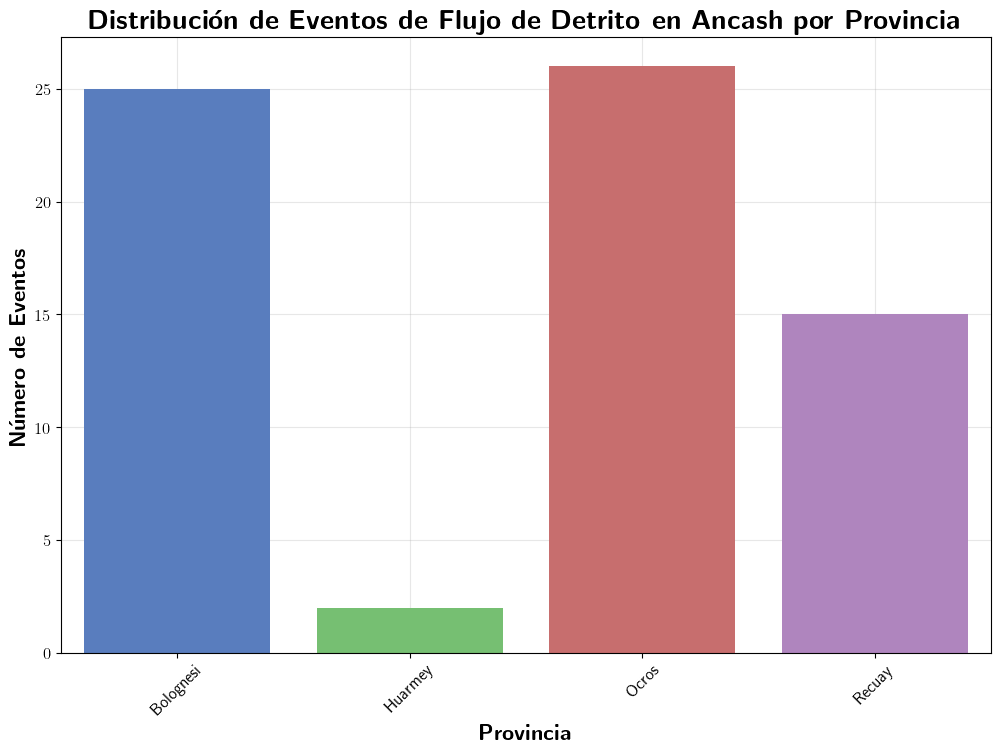

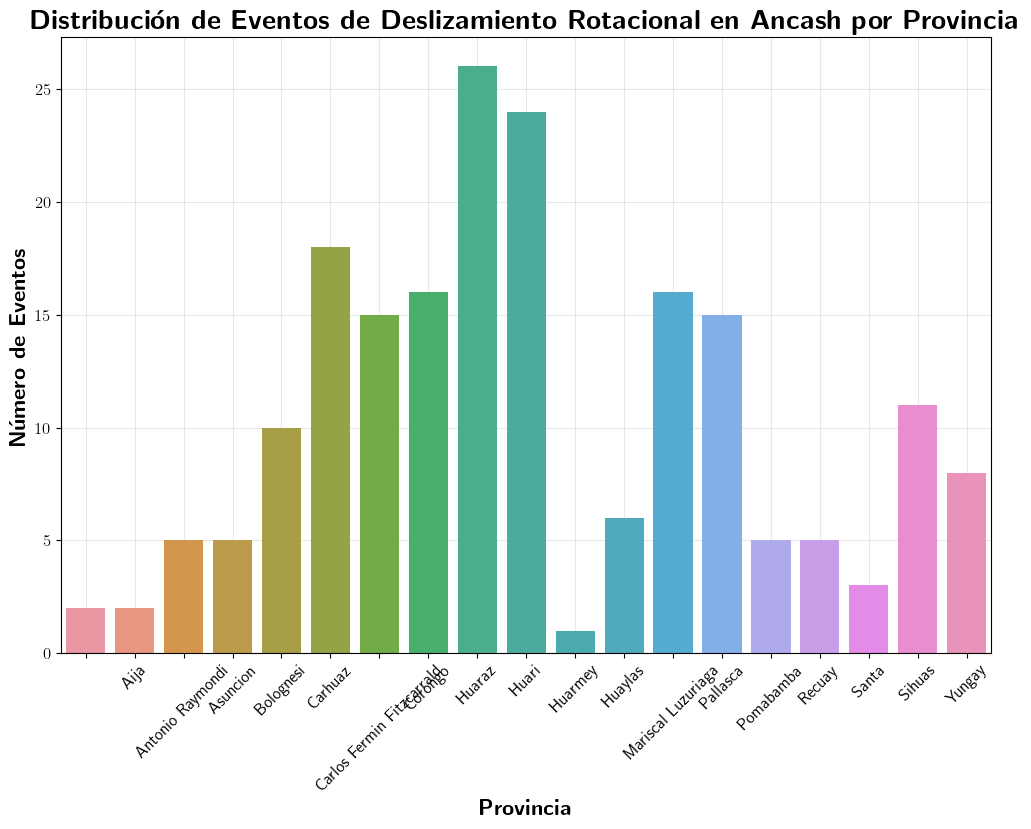

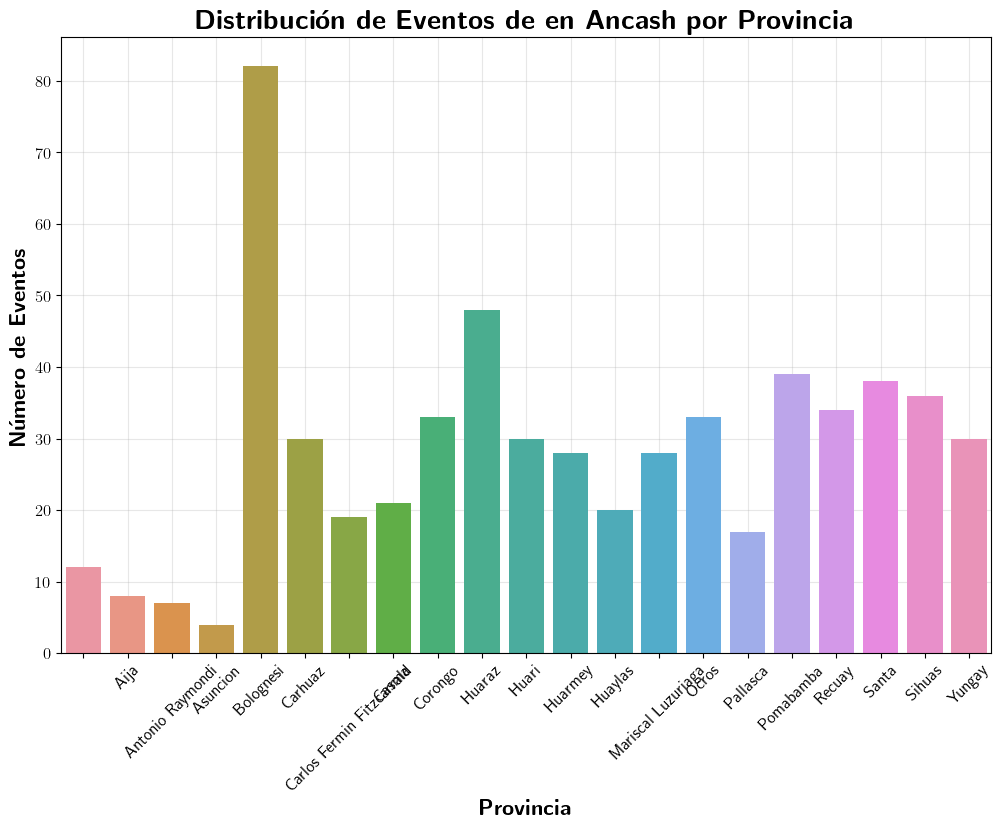

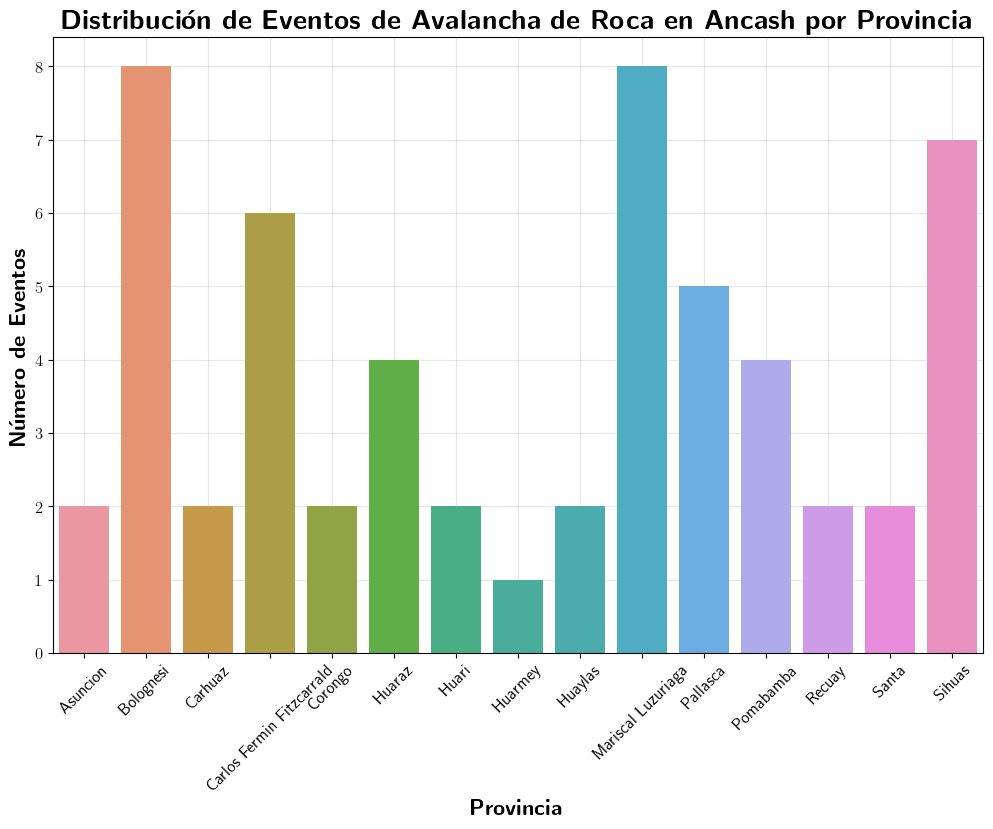

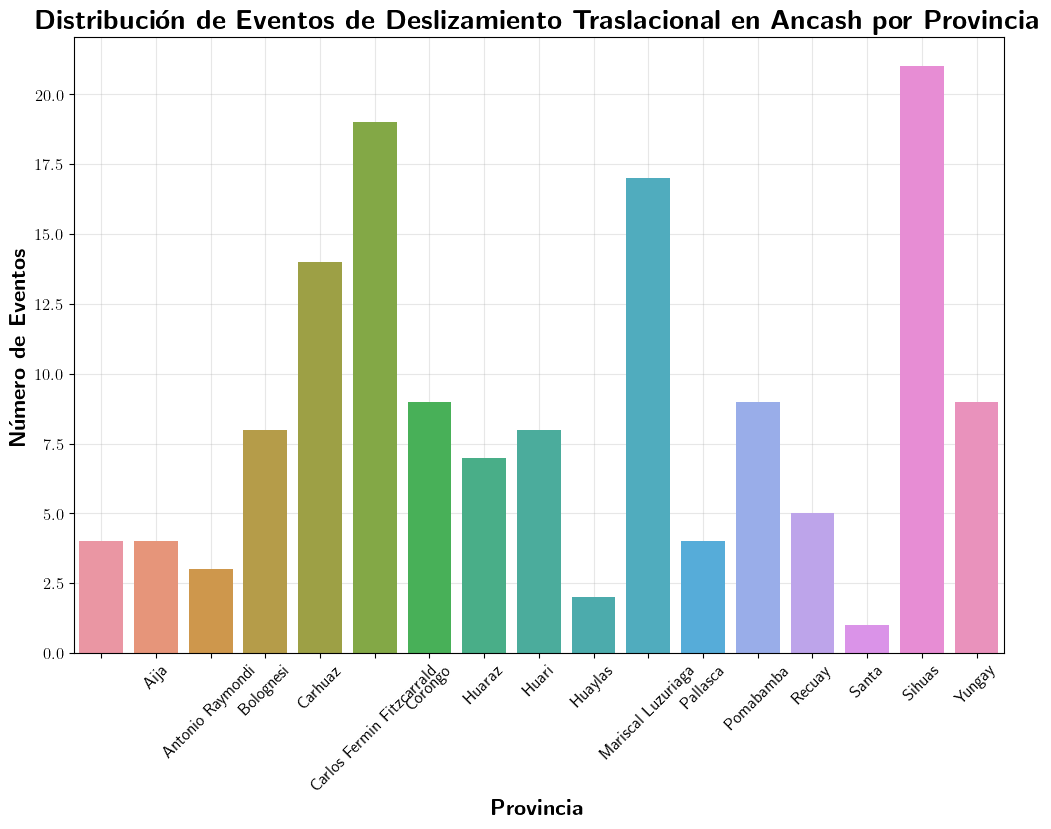

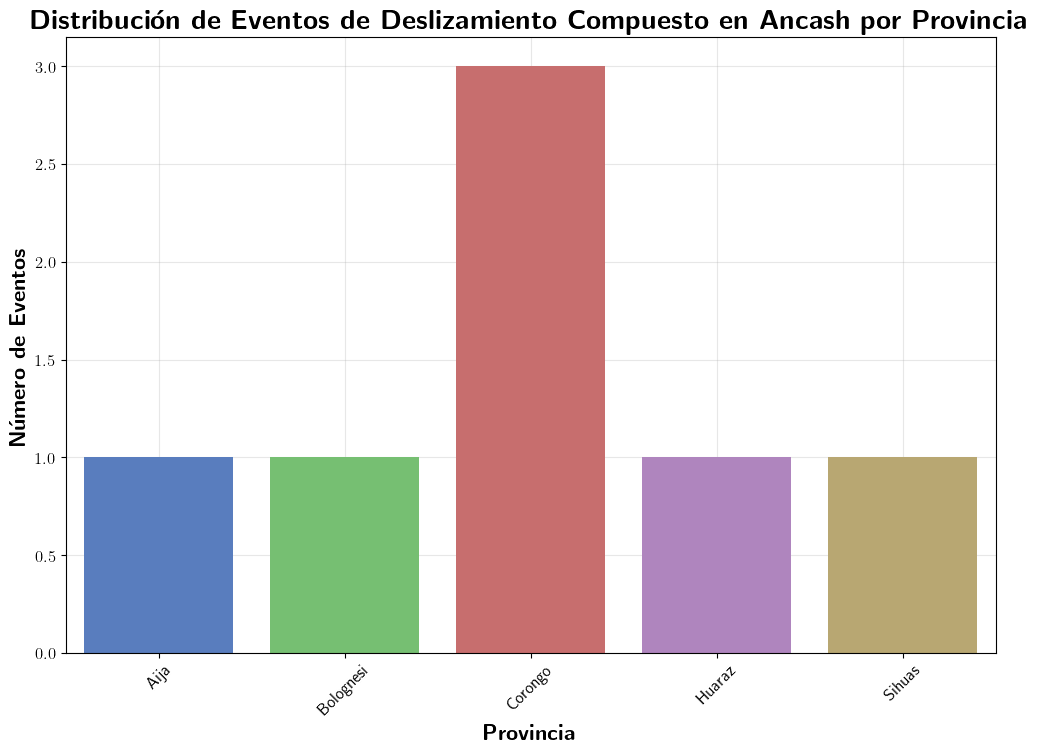

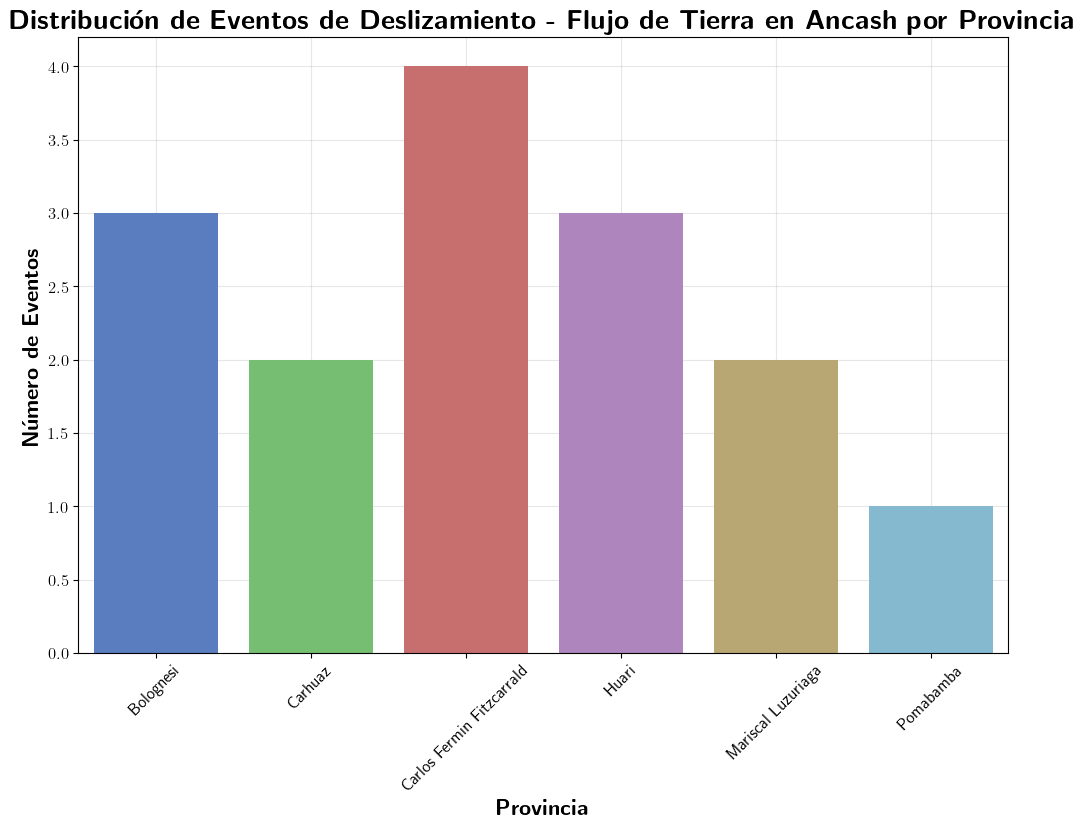

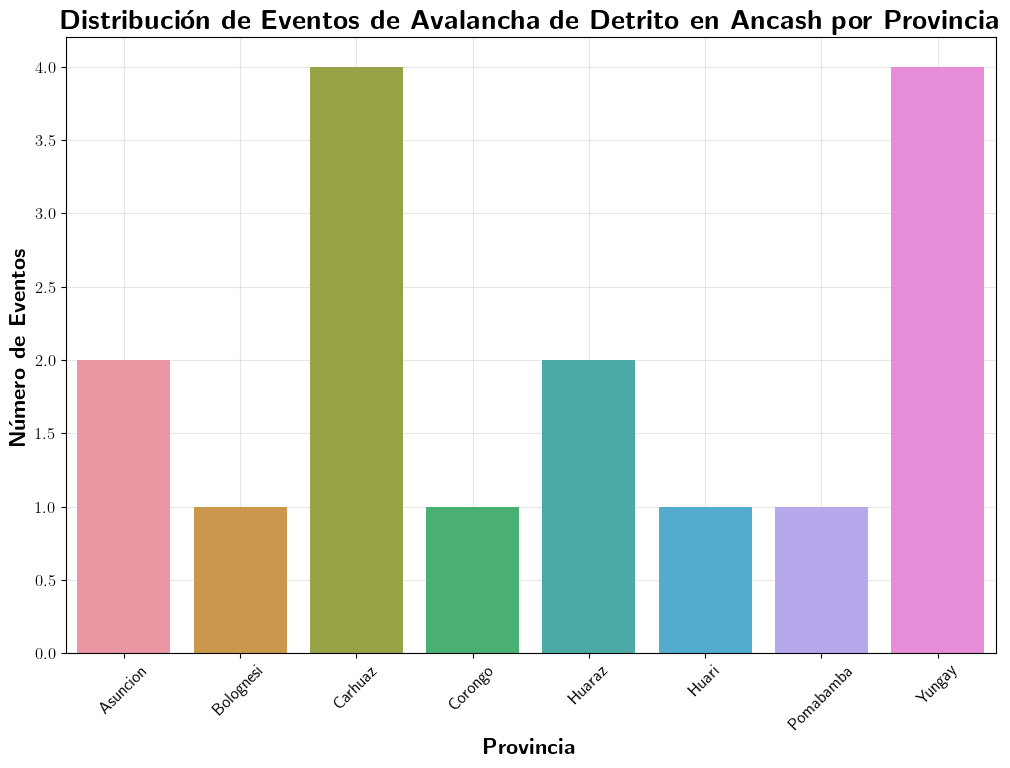

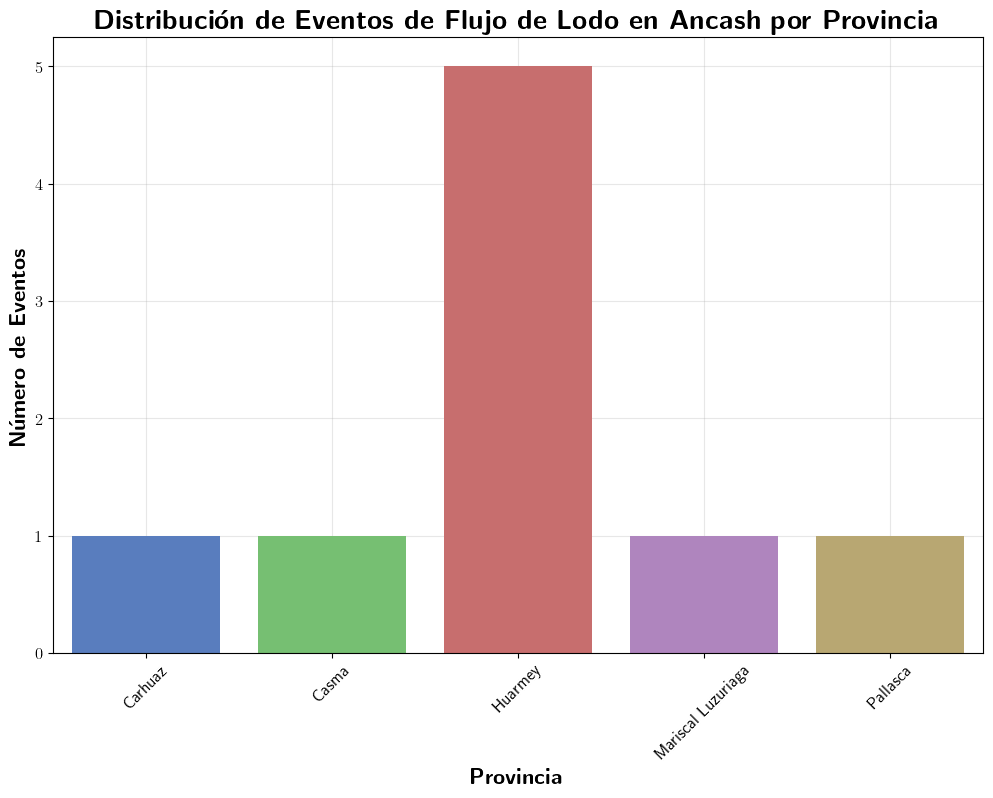

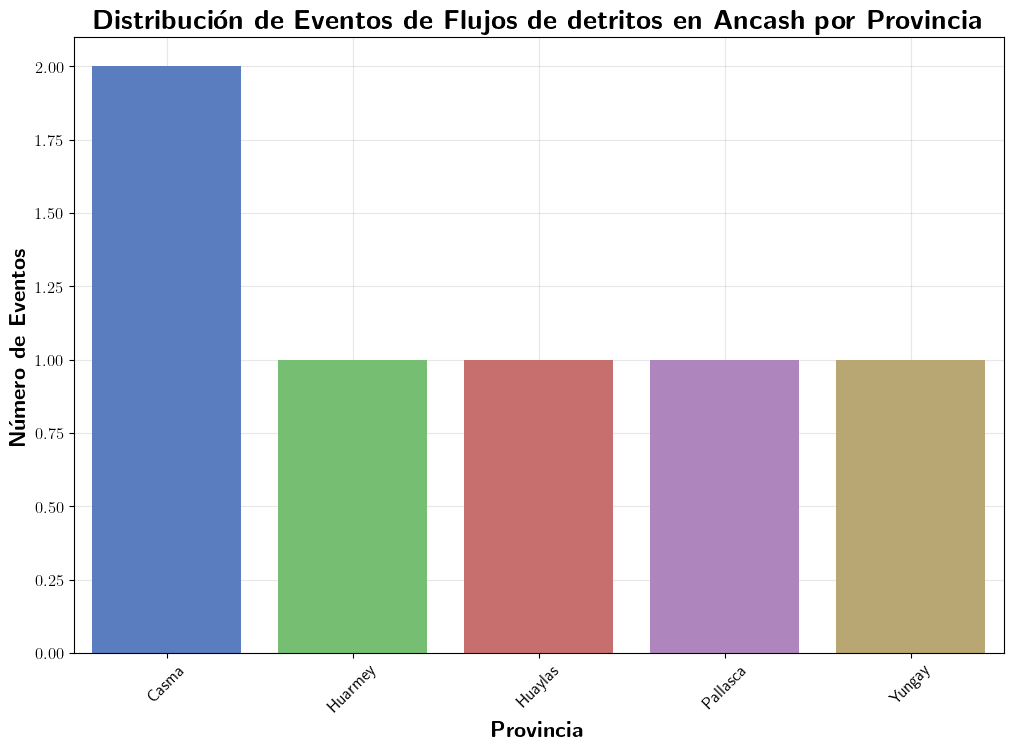

In [6]:
for event in event_types:
    event_data = event_counts_by_province[event_counts_by_province['Evento'] == event]
    if event_data['Provincia'].nunique() >= 4:
        plt.figure(figsize=(12, 8))
        sns.barplot(x=event_data['Provincia'], y=event_data['Cantidad'], zorder=2)
        plt.title(r'\textbf{Distribución de Eventos de %s en Ancash por Provincia}' % event, fontsize=20)
        plt.xlabel(r'\textbf{Provincia}', fontsize=16)
        plt.ylabel(r'\textbf{Número de Eventos}', fontsize=16)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.grid(True, alpha=0.3)
        
        # sns.despine()
        plt.show()

Mostramos las estadísticas descriptivas del conjunto de datos `ancash_data`.

Aquí, visualizamos la distribución de diferentes tipos de eventos en Ancash.


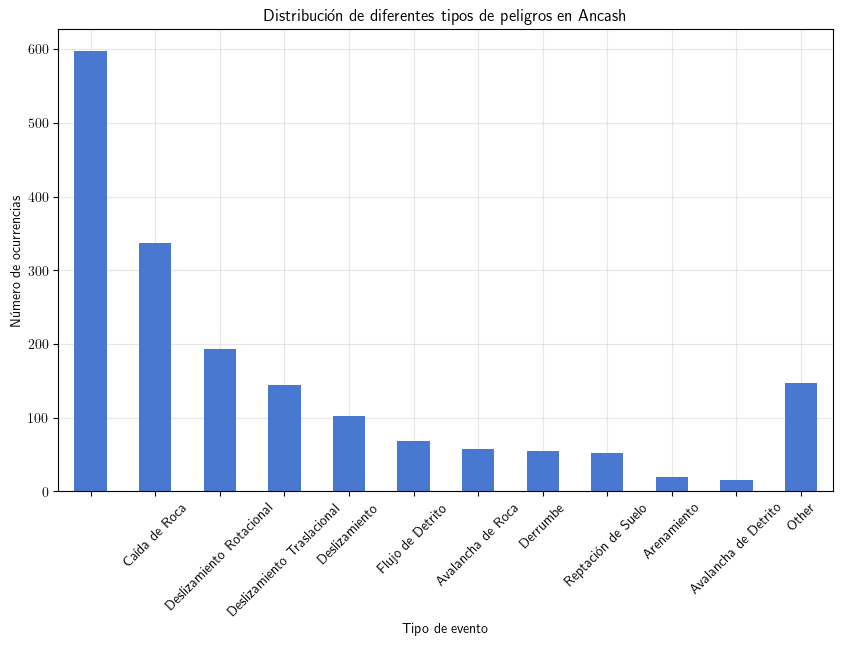

In [7]:
event_distribution = ancash_data['peligro_es'].value_counts()

threshold = 16

mask = event_distribution < threshold
tail = event_distribution.loc[mask]
event_distribution = event_distribution.loc[~mask]
event_distribution['Other'] = tail.sum()

plt.figure(figsize=(10,6))
event_distribution.plot(kind='bar', zorder=2)
plt.title('Distribución de diferentes tipos de peligros en Ancash')
plt.xlabel('Tipo de evento')
plt.ylabel('Número de ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Leemos los datos GeoJSON que representan las regiones de Perú.


In [8]:
url_geojson = "peru_provincial_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
display(region_geojson.head())

,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
0,9,0301,ABANCAY,APURIMAC,LEY,S/N,28/12/1961,21/11/1893,3.458273e+05,345827.34,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4..."
1,8,0902,ACOBAMBA,HUANCAVELICA,LEY,5292,23/11/1925,23/11/1925,9.263674e+04,92636.74,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8..."
2,7,0802,ACOMAYO,CUSCO,LEY,S/N,11/11/1964,02/01/1857,9.328581e+04,93285.81,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1..."
3,5,0202,AIJA,ANCASH,LEY,8188,21/12/1907,05/03/1936,6.963963e+04,69639.63,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763..."
4,6,1602,ALTO AMAZONAS,LORETO,LEY,S/N,08/09/1964,02/01/1857,1.917213e+06,1917212.66,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751..."


Ahora, combinamos los dos conjuntos de datos basándonos en los nombres de las provincias.

In [9]:
ancash_data['prov'] = ancash_data['prov'].str.upper()

events_per_province = ancash_data['prov'].value_counts().reset_index()
events_per_province.columns = ['prov', 'num_events']
region_geojson = region_geojson.merge(events_per_province, left_on='NOMBPROV', right_on='prov', how='left')
region_geojson['num_events'].fillna(0, inplace=True)

Finalmente, visualizamos el número de eventos en las provincias de Ancash junto con las ubicaciones de los eventos.


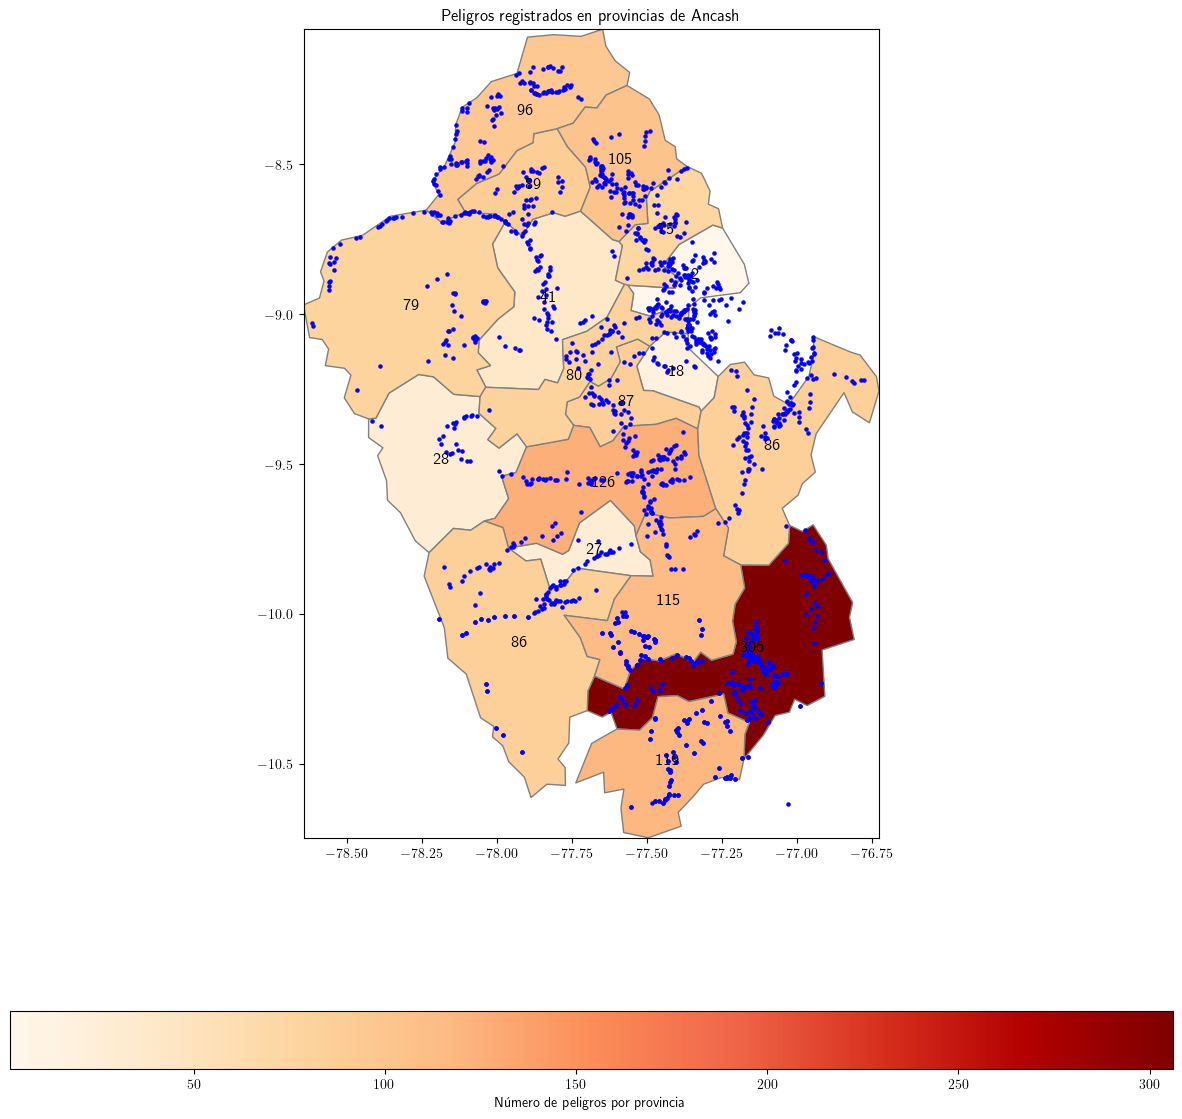

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))

ancash_geojson = region_geojson[region_geojson['NOMBPROV'].isin(ancash_data['prov'].unique())]

ancash_geojson.plot(column='num_events', ax=ax, legend=True, edgecolor=u'gray', cmap='OrRd', 
                    legend_kwds={'label': "Número de peligros por provincia", 'orientation': "horizontal"})

gdf = gpd.GeoDataFrame(ancash_data, geometry=gpd.points_from_xy(ancash_data.longitud, ancash_data.latitud))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)

xlim = (ancash_geojson.bounds.minx.min(), ancash_geojson.bounds.maxx.max())
ylim = (ancash_geojson.bounds.miny.min(), ancash_geojson.bounds.maxy.max())
ax.set_xlim(xlim)
ax.set_ylim(ylim)

for idx, row in ancash_geojson.iterrows():
    if row['num_events'] > 0:
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, str(int(row['num_events'])), 
                fontsize=12, ha='center', va='center')

plt.title('Peligros registrados en provincias de Ancash')
plt.show()